In [3]:
###Implementing Decision trees – ID3

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)

In [4]:
# BLOCK 2: Load Play Tennis dataset

data = {
    "Outlook": ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast","Sunny",
                "Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temperature": ["Hot","Hot","Hot","Mild","Cool","Cool","Cool","Mild",
                    "Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity": ["High","High","High","High","Normal","Normal","Normal","High",
                 "Normal","Normal","Normal","High","Normal","High"],
    "Wind": ["Weak","Strong","Weak","Weak","Weak","Strong","Strong","Weak",
             "Weak","Weak","Strong","Strong","Weak","Strong"],
    "PlayTennis": ["No","No","Yes","Yes","Yes","No","Yes","No",
                    "Yes","Yes","Yes","Yes","Yes","No"]
}

df = pd.DataFrame(data)
df


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
# BLOCK 3: Encode categorical data using LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

df


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [6]:
# BLOCK 4: Define features and target

X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0         1     1

Target (y):
0    0
1    0
2    1
3    1
4    1
Name: PlayTennis, dtype: int64


In [7]:
# BLOCK 5: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (11, 4)
Testing samples: (3, 4)


In [8]:
# BLOCK 6: Train ID3 model using entropy

id3_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
id3_tree.fit(X_train, y_train)

print("ID3 model trained successfully")


ID3 model trained successfully


In [9]:
# BLOCK 7: Make predictions

y_pred = id3_tree.predict(X_test)
print("Predicted values:", y_pred)
print("Actual values   :", y_test.values)


Predicted values: [1 1 0]
Actual values   : [1 1 0]


In [10]:
# BLOCK 8: Compute Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1 0]
 [0 2]]


In [11]:
# BLOCK 9: Compute performance metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = TN / (TN + FP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0


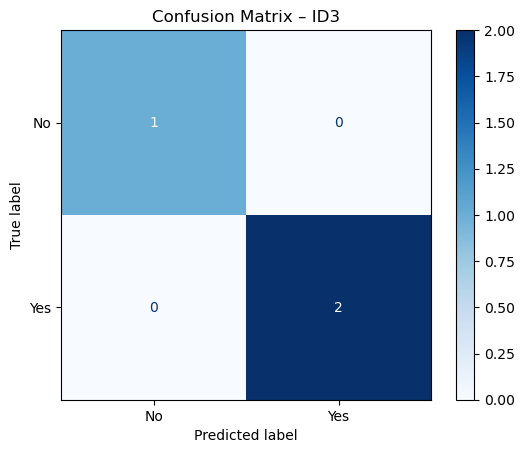

In [12]:
# BLOCK 10: Visualize Confusion Matrix

disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – ID3")
plt.show()


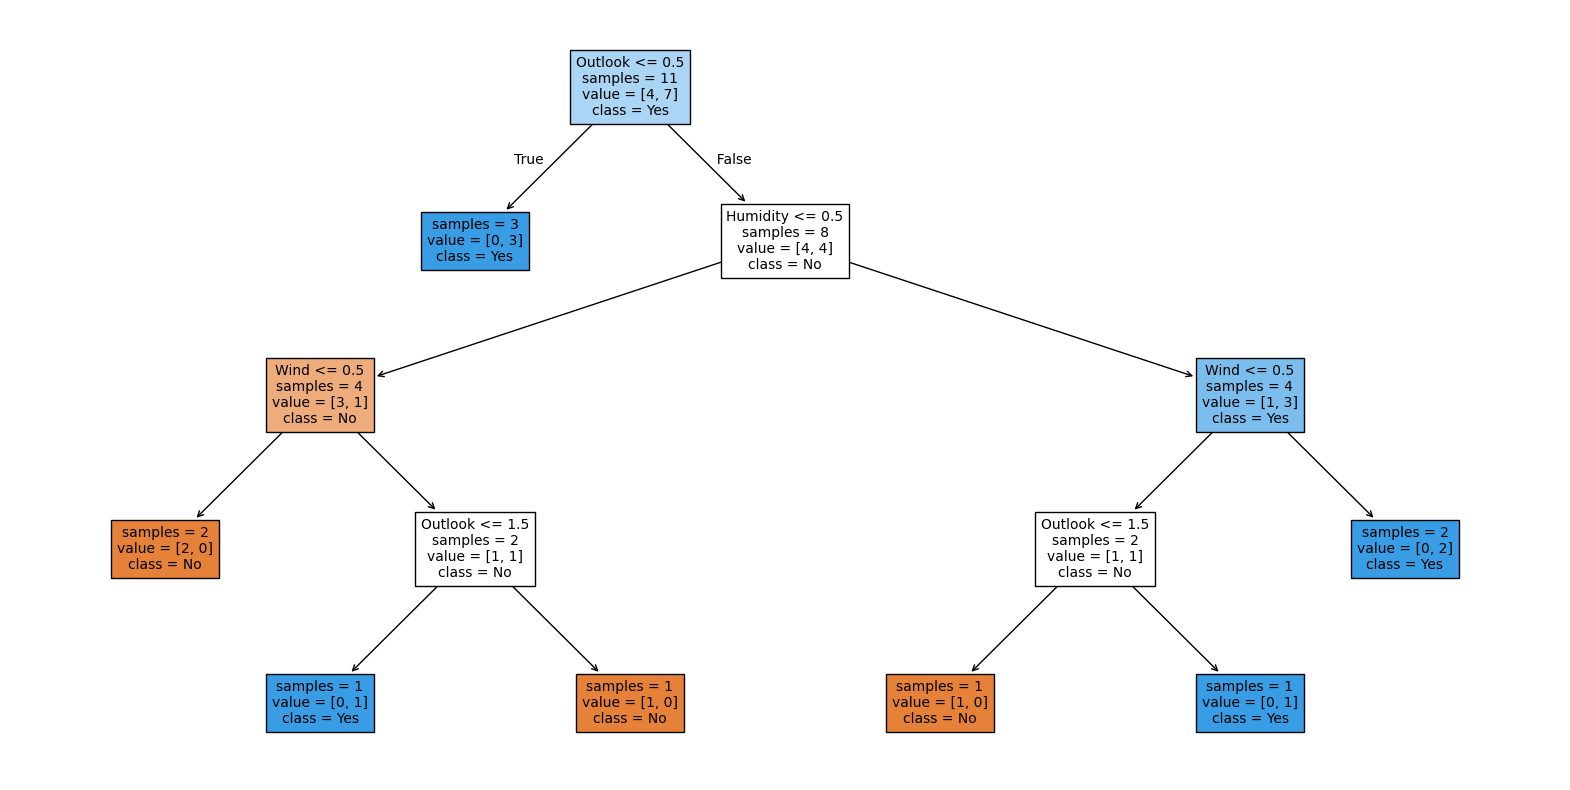

In [13]:
# BLOCK 11: Plot ID3 Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(
    id3_tree,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    impurity=False,
    fontsize=10
)
plt.show()


In [ ]:
#Implement Decision trees – CART

In [14]:
# BLOCK 1: Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)


In [15]:
# BLOCK 2: Load Play Tennis dataset

data = {
    "Outlook": ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast","Sunny",
                "Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temperature": ["Hot","Hot","Hot","Mild","Cool","Cool","Cool","Mild",
                    "Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity": ["High","High","High","High","Normal","Normal","Normal","High",
                 "Normal","Normal","Normal","High","Normal","High"],
    "Wind": ["Weak","Strong","Weak","Weak","Weak","Strong","Strong","Weak",
             "Weak","Weak","Strong","Strong","Weak","Strong"],
    "PlayTennis": ["No","No","Yes","Yes","Yes","No","Yes","No",
                    "Yes","Yes","Yes","Yes","Yes","No"]
}

df = pd.DataFrame(data)
df


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [16]:
# BLOCK 3: Encode categorical data using LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

df


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [17]:
# BLOCK 4: Define features (X) and target (y)

X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0         1     1

Target (y):
0    0
1    0
2    1
3    1
4    1
Name: PlayTennis, dtype: int64


In [18]:
# BLOCK 5: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (11, 4)
Testing samples: (3, 4)


In [19]:
# BLOCK 6: Train CART model using Gini Index

cart = DecisionTreeClassifier(criterion="gini", random_state=42)
cart.fit(X_train, y_train)

print("CART model trained successfully")


CART model trained successfully


In [20]:
# BLOCK 7: Make predictions using CART

y_pred = cart.predict(X_test)

print("Predicted values:", y_pred)
print("Actual values   :", y_test.values)


Predicted values: [1 1 0]
Actual values   : [1 1 0]


In [21]:
# BLOCK 8: Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1 0]
 [0 2]]


In [22]:
# BLOCK 9: Compute performance metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = TN / (TN + FP)

print("CART Accuracy:", accuracy)
print("CART Precision:", precision)
print("CART Recall:", recall)
print("CART F1 Score:", f1)
print("CART Specificity:", specificity)


CART Accuracy: 1.0
CART Precision: 1.0
CART Recall: 1.0
CART F1 Score: 1.0
CART Specificity: 1.0


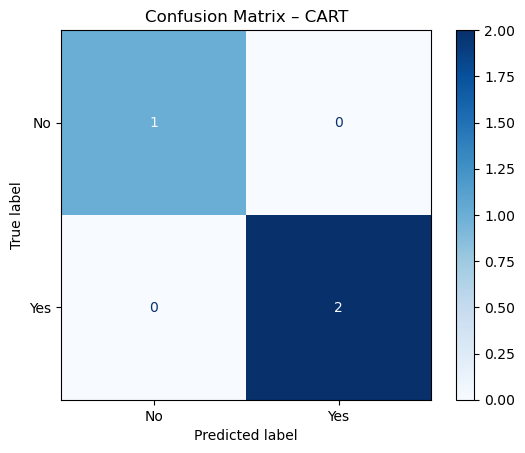

In [23]:
# BLOCK 10: Visualize confusion matrix

disp = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – CART")
plt.show()


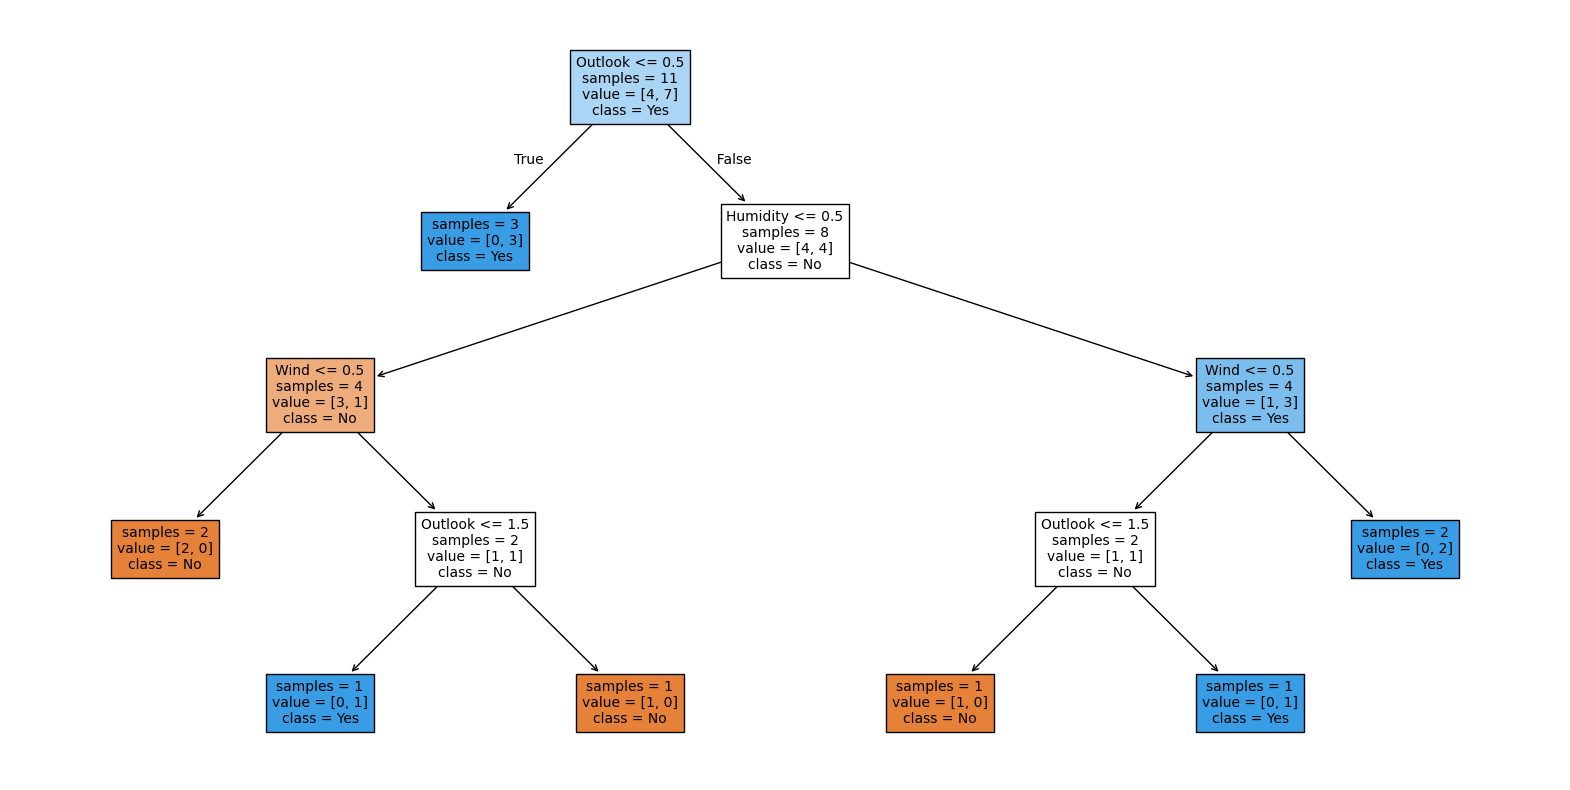

In [24]:
# BLOCK 11: Plot CART Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(
    cart,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    impurity=False,
    fontsize=10
)
plt.show()
